# Lendo dados do MovieLens

In [54]:
import pandas as pd

In [97]:
filmes = pd.read_csv("../arquivos/filmes/movies.csv")
#filmes é um dataframe
filmes.columns = ["filmesID","titulo","genero"]
filmes.head()

,filmesID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
#lendo a documentação(pode ser de qualquer elemento python)
?filmes

In [31]:
aval =  pd.read_csv("../arquivos/filmes/ratings.csv")

In [32]:
aval.columns=["usuarioID","filmesID","nota","momento"]

In [33]:
aval.head()

,usuarioID,filmesID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
#ver quantidae de linhas
aval.shape

(100836, 4)

In [35]:
len(aval)

100836

In [41]:
#metodo describe
aval.describe()

,usuarioID,filmesID,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [39]:
#aplicando describe em uma coluna
notas = aval["nota"]
notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [43]:
notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [51]:
avaliacao_filme_1 = aval.query("filmesID==1")

In [53]:
avaliacao_filme_1.mean()

usuarioID    3.065302e+02
filmesID     1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [52]:
# media de nota de um filme(toy story)
avaliacao_filme_1["nota"].mean()

3.9209302325581397

In [55]:
#avaliações do filme 1
avaliacao_filme_1.head()

,usuarioID,filmesID,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [59]:
#vendo a media de cada filme(é preciso agrupar )
notas_medias_por_filme = aval.groupby("filmesID")["nota"].mean()
notas_medias_por_filme.head()

filmesID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [98]:
filmes.head()

,filmesID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### juntando o dataFrame com o Series

In [102]:
#JOIN
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmesID")
filmes_com_media.head()

,filmesID,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [111]:
filmes_ordenados = filmes_com_media.sort_values("nota", ascending=False)
filmes_ordenados.head(10)

,filmesID,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [109]:
#achando os filmes que não tem notas
filmes_NAN = filmes_com_media.query("nota == 'NaN'")
filmes_NAN["titulo"]


816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

In [110]:
len(filmes_NAN)

18

##### colocar o numero de avaliações por filme, isso é, não só a média o total de votos por filme

In [119]:
import matplotlib.pyplot as plt

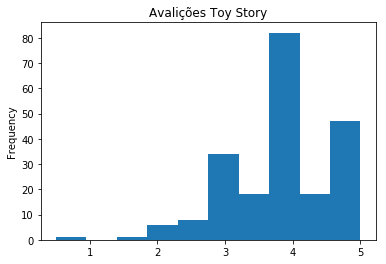

In [123]:
aval.query("filmesID ==1")["nota"].plot(kind="hist")
plt.title("Avalições Toy Story")
plt.show()

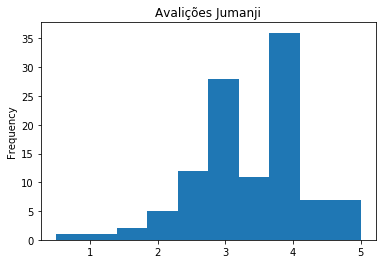

In [124]:
aval.query("filmesID ==2")["nota"].plot(kind="hist")
plt.title("Avalições Jumanji")
plt.show()

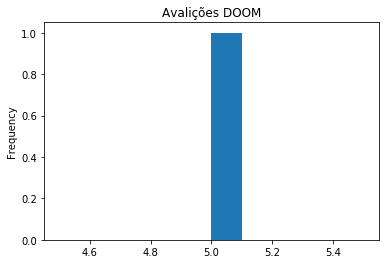

In [125]:
aval.query("filmesID ==102084")["nota"].plot(kind="hist")
plt.title("Avalições DOOM")
plt.show()